In [2]:
# install kaggle
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"riyashah25","key":"01889b5938d0e06123c82b67403f2efd"}'}

In [4]:
# create a kaggle folder
! mkdir ~/.kaggle

In [5]:
# copy the json file ni kaggle folder 
! cp kaggle.json ~/.kaggle/

In [6]:
# permission to json ACT 
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                  Data Science Job Salaries                             7KB  2022-06-15 08:59:12          15914        508  1.0              
faryarmemon/usa-housing-market-factors              U.S. Housing Market Factors                          32KB  2022-08-03 02:19:31            275         24  1.0              
zzettrkalpakbal/full-filled-brain-stroke-dataset    Brain stroke prediction dataset                      52KB  2022-07-16 09:57:08           1667         51  0.9705882        
himanshunakrani/student-study-hours                 Student Study Hours                                  276B  2022-07-2

## Download the Data From the kaggle


In [8]:
# search data set 
!kaggle datasets list -s 'TESS '

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ejlok1/toronto-emotional-speech-set-tess                           Toronto emotional speech set (TESS)                 428MB  2019-08-24 23:03:36           8107        100  0.875            
dmitrybabko/speech-emotion-recognition-en                          Speech Emotion Recognition (en)                     987MB  2021-01-25 12:59:50           3729         48  0.875            
uldisvalainis/audio-emotions                                       Audio emotions                                        1GB  2020-06-09 12:56:17           1210         23  0.75             
cracc97/features                             

In [9]:
!kaggle datasets download -d 'ejlok1/toronto-emotional-speech-set-tess'

 97% 417M/428M [00:03<00:00, 113MB/s] 
100% 428M/428M [00:03<00:00, 115MB/s]


In [10]:
! unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

### Import Library

In [11]:
import librosa
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np

### Store the DataPath and labels

In [12]:
path = '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/'
tess_directory_list = os.listdir(path)
paths = []
labels = []  
for dir in tess_directory_list:
  directories = os.listdir(path+dir)
  for file in directories:
    part = file.split('.')[0]
    part = part.split('_')[2]
    if part == 'ps':
      labels.append('surprise')
    else:
      labels.append(part)
    
    paths.append(path + dir + '/' + file)
  # "/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav"

In [13]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_wash_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_cab_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_rot_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_third_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_sell_sad.wav']

In [14]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [15]:
#  create dataset 
df = pd.DataFrame()
df['speech'] = paths
df['labels'] = labels
df.head()

,speech,labels
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   speech  2800 non-null   object
 1   labels  2800 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB


In [17]:
df['labels'].value_counts()

sad         400
disgust     400
surprise    400
happy       400
fear        400
angry       400
neutral     400
Name: labels, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


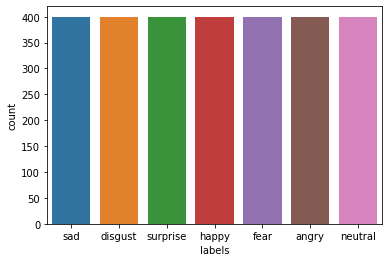

In [18]:
sns.countplot(df.labels)

In [19]:
classes = [df['labels'][0] , df['labels'][400] , df['labels'][800] , df['labels'][1200] , df['labels'][1600] , df['labels'][2000] , df['labels'][2400]]

In [20]:
classes

['sad', 'disgust', 'happy', 'angry', 'surprise', 'neutral', 'disgust']

## wave plot and spectogram


In [21]:
def waveplot(data , sr , emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion , size=15)
  librosa.display.waveplot(data , sr = sr)
  plt.show()

def spectogram(data ,sr , emotion):

  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(10,4))
  plt.title(emotion , size=15)
  librosa.display.specshow(xdb , sr = sr , x_axis = 'time' , y_axis = 'hz')
  plt.show()


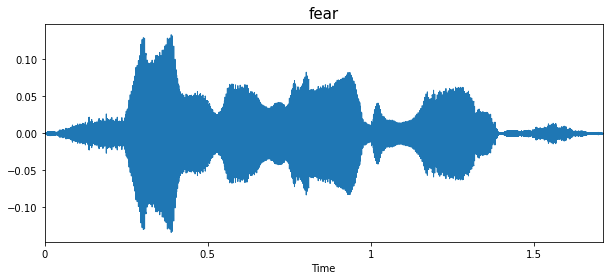

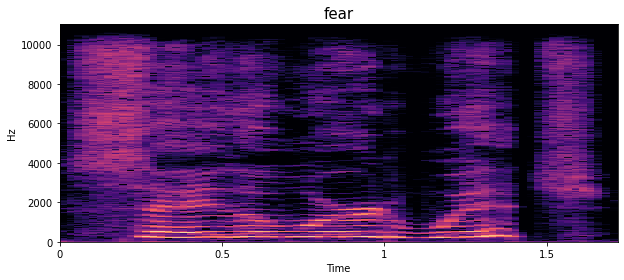

In [22]:
emotion = 'fear'
path = np.array(df['speech'][df['labels']==emotion])[0]
data , sampling_rate = librosa.load(path)
waveplot(data , sampling_rate , emotion)
spectogram(data , sampling_rate , emotion)
Audio(path)

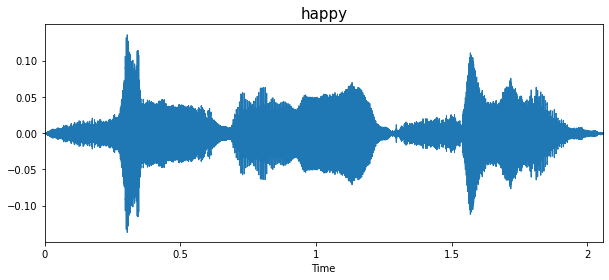

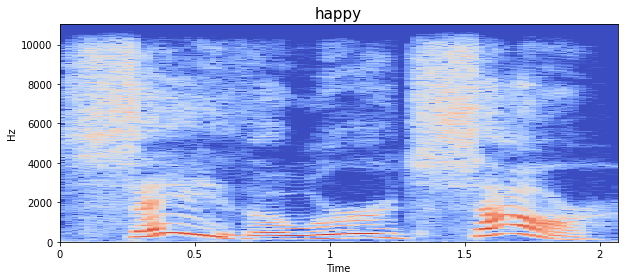

In [23]:
emotion = 'happy'
path = np.array(df['speech'][df['labels']==emotion])[0]
data , sampling_rate = librosa.load(path)
waveplot(data , sampling_rate , emotion)
spectogram(data , sampling_rate , emotion)
Audio(path)

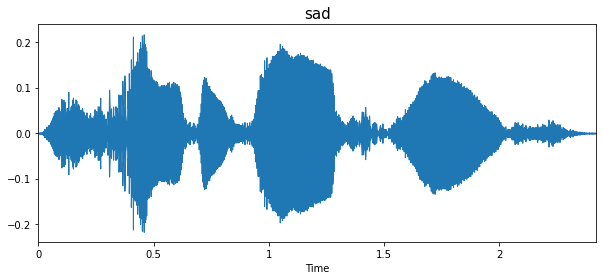

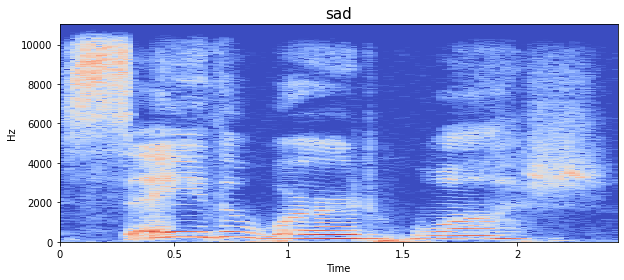

In [24]:
emotion = 'sad'
path = np.array(df['speech'][df['labels']==emotion])[0]
data , sampling_rate = librosa.load(path)
waveplot(data , sampling_rate , emotion)
spectogram(data , sampling_rate , emotion)
Audio(path)


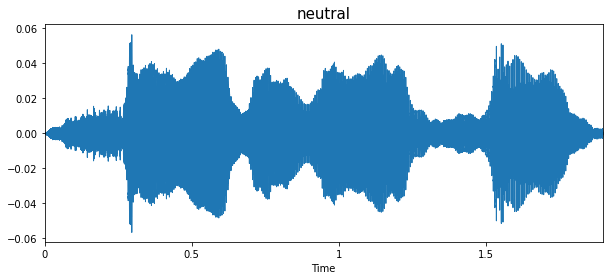

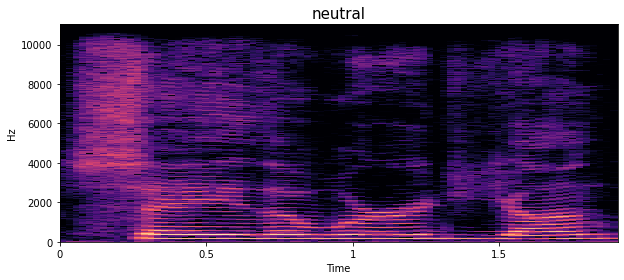

In [25]:
emotion = 'neutral'
path = np.array(df['speech'][df['labels']==emotion])[0]
data , sampling_rate = librosa.load(path)
waveplot(data , sampling_rate , emotion)
spectogram(data , sampling_rate , emotion)
Audio(path)

## Feature Extracting

In [26]:
def extract_mfcc(filename):
  y , sr = librosa.load(filename , duration = 3 , offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y , sr = sr , n_mfcc = 40).T , axis=0)
  return mfcc

In [27]:
a = extract_mfcc(df['speech'][0])

In [28]:
a.shape

(40,)

In [29]:
x_mfcc = df['speech'].apply(lambda x : extract_mfcc(x))

In [30]:
x_mfcc

0       [-409.94775, 88.04708, 18.8674, 39.361115, -9....
1       [-397.3796, 96.29674, 8.777555, 31.004198, -7....
2       [-408.7354, 99.50804, 21.480354, 33.183952, -8...
3       [-383.4046, 113.69906, 21.644726, 34.940002, -...
4       [-362.0869, 85.13022, 30.161919, 31.509514, -9...
                              ...                        
2795    [-393.67297, 107.06564, -9.77471, 13.327681, -...
2796    [-508.38846, 112.87418, 29.617601, 42.44935, 8...
2797    [-435.8568, 80.07284, -2.904402, 27.990509, 0....
2798    [-393.29086, 79.11124, -20.689594, 33.35503, -...
2799    [-389.43658, 71.76163, -10.889018, 14.298601, ...
Name: speech, Length: 2800, dtype: object

In [31]:
x_mfcc.shape

(2800,)

In [32]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [33]:
# input reshape
# expand dimention is insert new axis in the array  
X = np.expand_dims(X , -1)  
X.shape

(2800, 40, 1)

In [34]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['labels']])
# y is in the type od scipy.sparce array type so that convert it inti array
y = y.toarray()

In [35]:
y.shape

(2800, 7)

In [36]:
from keras.models import Sequential
from keras.layers import Dense , LSTM , Dropout

# model = Sequential([
#                     LSTM(256  , return_sequences=False ,input_shape=(40,1)),
#                     Dropout(0.2),
#                     Dense(128 , 'relu'),
#                     Dropout(0.2),
#                     Dense(64 , 'relu'),
#                     Dropout(0.2),
#                     Dense(7 , 'softmax')
# ])

model = Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax'),
    
])

model.compile(loss = "categorical_crossentropy" , optimizer = 'SGD' , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

In [37]:
history = model.fit(X , y , validation_split=0.2 , epochs = 60 , batch_size = 64)

Epoch 1/60
35/35 [==============================] - 7s 22ms/step - loss: 1.8785 - accuracy: 0.2406 - val_loss: 2.0723 - val_accuracy: 0.0000e+00
Epoch 2/60
35/35 [==============================] - 0s 7ms/step - loss: 1.7771 - accuracy: 0.3156 - val_loss: 2.0806 - val_accuracy: 0.0000e+00
Epoch 3/60
35/35 [==============================] - 0s 7ms/step - loss: 1.7209 - accuracy: 0.3411 - val_loss: 2.0668 - val_accuracy: 0.0482
Epoch 4/60
35/35 [==============================] - 0s 7ms/step - loss: 1.6538 - accuracy: 0.3987 - val_loss: 2.0668 - val_accuracy: 0.0875
Epoch 5/60
35/35 [==============================] - 0s 6ms/step - loss: 1.5846 - accuracy: 0.4388 - val_loss: 2.0352 - val_accuracy: 0.1429
Epoch 6/60
35/35 [==============================] - 0s 6ms/step - loss: 1.5342 - accuracy: 0.4674 - val_loss: 1.9874 - val_accuracy: 0.1804
Epoch 7/60
35/35 [==============================] - 0s 7ms/step - loss: 1.4820 - accuracy: 0.4911 - val_loss: 2.0153 - val_accuracy: 0.1821
Epoch 8/60


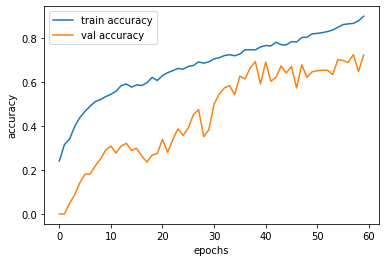

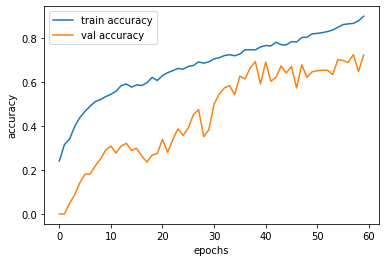

In [42]:
epochs = list(range(60))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs , acc , label = 'train accuracy')
plt.plot(epochs , val_acc , label = 'val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

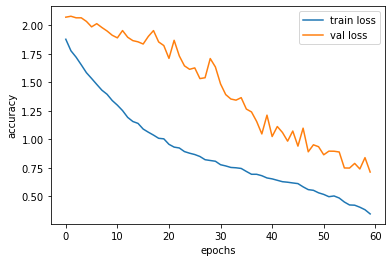

In [40]:
epochs = list(range(60))
acc = history.history['loss']
val_acc = history.history['val_loss']

plt.plot(epochs , acc , label = 'train loss')
plt.plot(epochs , val_acc , label = 'val loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [41]:
x_test = X[2100:]
y_pred = model.predict(x_test)
y_pred.argmax(1)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 0, 0, 2, 2, 2, 3, 0,
       0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 2, 2, 2, 6, 2, 0,
       0, 3, 0, 0, 3, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 3, 2, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 3, 0, 0,
       2, 0, 0, 0, 3, 0, 0, 0, 3, 2, 3, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 3, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 2, 0, 3, 2, 2, 0, 0, 0, 0, 3,
       3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 1,

In [43]:
def predict_emotion(file):
  y , sr = librosa.load(file , duration = 3 , offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y , sr = sr , n_mfcc = 40).T , axis=0)
  np.array(mfcc)
  X = np.expand_dim(mfcc , -1)
  y = model.predict(X)
  y = y.argmax(1)
  return classes[y]

In [59]:
# path = 'C:\\Users\\Administrator\\Documents\\Sound recordings\\Recording.m4a'
# predict_emotion(path)

In [58]:
# path = 'C:\\Users\\Administrator\\Documents\\Sound recordings\\Recording_happy.M4A'
# predict_emotion(path)